# Parcial 3: 
### Curso: Metodos computacionales 
### Profesor: Hernán David Salinas Jiménez


La entrega del examen se debe realizar a traves del git-hub en el directorio de cada estudiante.


# Ecuaciones diferenciales


## Body Planet Orbits
1. (33%) Newton’s explanation of the motion of the planets in terms of a universal law of gravitation is one of the great achievements of science. He was able to prove that the planets traveled along elliptical paths with the sun at one vertex and to predict periods of the motion accurately. All Newton needed to postulate was that the force between a planet of mass $m$ and the sun of mass $M$ is

\begin{equation}
F^{(g)} = -\frac{GmM}{r^2}
\end{equation}

Here $r$ is the planet-CM distance, $G$ is the universal gravitational constant, and the attractive force lies along the line connecting the planet and the sun. The hard part for Newton was solving the resulting differential equations because he had to invent calculus to do it and then had go through numerous analytic manipulations. The numerical solution is straightforward since even for planets the equation of motion is still

\begin{equation}
\vec{f}=m\vec{a} = m \frac{\mathrm{d}^2\vec{r}}{\mathrm{d}t^2}
\end{equation}

with the force having components:

\begin{equation}
f_x  = F^{(g)}\cos \theta =  F^{(g)}\frac{x}{r}
\end{equation}


\begin{equation}
f_y  = F^{(g)}\sin \theta =  F^{(g)}\frac{y}{r}
\end{equation}

where 

\begin{equation}
r=\sqrt{x^2+y^2}
\end{equation}



The equation of motion yields two simultaneous second-order ODEs:

\begin{equation}
\frac{\mathrm{d}^2x}{\mathrm{d}t^2}=-GM \frac{x}{r^3}
\end{equation}

\begin{equation}
\frac{\mathrm{d}^2y}{\mathrm{d}t^2}=-GM \frac{y}{r^3}
\end{equation}


a. Solve the diferential equation with the next parameter:

Assume units such that GM = 1 and use the initial conditions x(0) = 0.5, y(0) = 0, vx(0) = 0.0, vy(0) = 1.63.

b. Realice a graph kind subplot with 1 row and 2 columns: in the first subplot include the graph: x vs t, y vs t and the second graph y vs x,  what is the conclusion of this results?.



In [154]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Conclusión: la órbita efectivamente toma la forma de una elipse



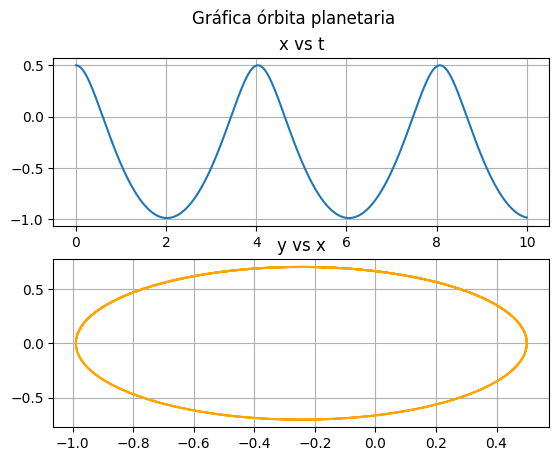

In [160]:
#Función que retorna las ecuaciones diferenciales en x y en y
def func(condiciones, t): #Pide condiciones de posición inicial 
  x0, vx0, y0, vy0 = condiciones
  GM = 1
  r = np.sqrt(x0**2 + y0**2)

  dxdt = vx0 #Velocidad en x
  dx2dt = -GM*x0/r**3 #Segunda derivada de x

  dydt = vy0 #Velocidad en y
  dy2dt = -GM*y0/r**3 #Segunda derivada de y

  return np.array((dxdt, dx2dt, dydt, dy2dt))

t = np.linspace(0,10,1000)  #Array del tiempo
#Condiciones iniciales
posx0, vel_x0 = 0.5, 0    
posy0, vel_y0 = 0  ,  1.63
condiciones = np.array((posx0, vel_x0, posy0, vel_y0))

#Odeint que soluciona las ecs diferenciales
p = odeint(func, condiciones, t)

#GRAFICACIÓN
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Gráfica órbita planetaria')
ax1.plot(t, p[:,0])
ax1.set_title('x vs t')
ax1.grid()
ax2.plot(p[:,0], p[:,2], color='orange')
ax2.set_title('y vs x')
ax2.grid()

print('Conclusión: la órbita efectivamente toma la forma de una elipse\n')


### Integracion 
2. (33%) Las [integrales elipticas](https://es.wikipedia.org/wiki/Integral_el%C3%ADptica#:~:text=Una%20integral%20el%C3%ADptica%20de%20primera,segundas%20dependen%20de%20dos%20variables) son integrales que permite dar solución a múltiples problemas en física y matemáticas. Algunos ejemplos de su uso, pueden ser encontrados en las siguientes referencias [[1]](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html)
[[2]](http://www.sc.ehu.es/sbweb/fisica_/numerico/integral/eliptica_ejemplos.html). El siguiente problema esta relacionado con al integración eliptica.


La [longitud de arco](http://www.sc.ehu.es/sbweb/fisica3/especial/eliptica/eliptica.html) de  una elipse puede ser calculada a través de la siguiente integral.

\begin{equation}
L(k) = 4a\int_0^{\pi/2}  \mathrm{d} \phi \sqrt{1-k^2\sin^2 \phi}
\end{equation}

donde $ k^2 = \frac{a^2-b^2}{a^2} = \epsilon $, siendo $\epsilon$ la excentricidad de la elipse, a y b el semieje mayor y menor de la elipse respectivamente, $a>b$.

1. Para $b = 1$, y $a$ entre 1 y 100, construya un conjunto de valores de excentrecidades y realice la integración para cada excentrecidad.
Construya un grafico de $L$ vs $\epsilon$.

2. Determine la longitud de arco de la solucion del problema 1.



In [87]:
from scipy.integrate import trapz #Importamos el método del trapecio de scipy

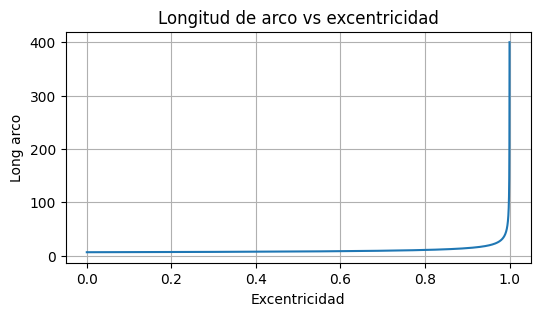

In [156]:
n = 1000 #número de trapecios
a = np.linspace(1,100,n)
b = 1
k = np.sqrt((a**2 - b**2)/a**2)
phi = np.linspace(0, np.pi/2, n)   #Dominio de phi

#Función que está dentro de la integral
def f(phi,k,a):
  return 4*a*np.sqrt(1 - (k**2)*(np.sin(phi)**2))

L = np.zeros(n)
for i in range(n):
  y = f(phi,k[i], a[i]) #Definimos un y distinto para cada k y a
  L[i] = trapz(y, phi)  #Calculamos la integral cada vez

#GRAFICACIÓN
plt.figure(figsize=(6,3))
plt.title('Longitud de arco vs excentricidad')
plt.plot(k**2, L)
plt.xlabel('Excentricidad')
plt.ylabel('Long arco')
plt.grid()

In [157]:
#@title Solución para el problema 1:

#Nos traemos las soluciones del problema 1
p = odeint(func, condiciones, t)
x = p[:,0]
y = p[:,2]

#Hallamos los máximos y mínimos en x y en y para hallar los semiejes
minX = abs(min(x))
maxX = abs(max(x))

minY = abs(min(y))
maxY = abs(max(y))

n = 100 #Número de trapecios
b = (minY+maxY)/2 #semieje_menor
a = (minX+maxX)/2 #semieje mayor
phi = np.linspace(0, np.pi/2, n)  #Dominio de phi
k = np.sqrt((a**2 - b**2)/a**2)

def f(phi):
  return 4*a*np.sqrt(1 - (k**2)*(np.sin(phi)**2))
y = f(phi)
longitud_de_arco = trapz(y,phi) #Cálculo de la integral
print(f'longitud de arco del primer punto: {longitud_de_arco}')

longitud de arco del primer punto: 4.54927327198452



### Matrices: Rotación  en el plano, autovalores y autovectores
3 (33%).   Considere la siguiente matrix de rotación:
\begin{bmatrix} 
\cos \theta & -\sin \theta\\ 
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución. 

Encontrar los autovalores y autovectores para $\theta=45$.

In [158]:
A = np.array([[np.cos(45), -np.sin(45)],
              [np.sin(45), np.cos(45)]])

autoval , autovec = np.linalg.eig(A)
poly = np.poly(A)
D = np.linalg.inv(autovec) @ A @ autovec

print(f'Matriz: \n{A}\n')
print(f'Polinomio característico con coeficientes: {A}\n')
print(f'Autovectores: \n{autovec}\n')
print(f'Autovalores: \n{autoval}\n')
print(f'Diagonalización: \n{D}')

Matriz: 
[[ 0.52532199 -0.85090352]
 [ 0.85090352  0.52532199]]

Polinomio característico con coeficientes: [[ 0.52532199 -0.85090352]
 [ 0.85090352  0.52532199]]

Autovectores: 
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]

Autovalores: 
[0.52532199+0.85090352j 0.52532199-0.85090352j]

Diagonalización: 
[[0.52532199+0.85090352j 0.        +0.j        ]
 [0.        +0.j         0.52532199-0.85090352j]]
